# Phase 1



**Data Collection/preparation part.**

1.1 The population of each state.

1.2 Literacy Rate in each state

1.3 Area of each state

1.4 Collect any other data that helps with your analysis. There is no limitation for anything.

1.5 Create a new file and keep the above-collected data.



In [90]:
!pip install --upgrade plotly
!pip install --upgrade geopandas

In [132]:
#  importing important lab
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import pandas as pd
import seaborn as sns

In [133]:
import selenium                                  #library that is used to work with selenium

from selenium import webdriver                   #importing webdriver module from selenium to open automated chrome window

import pandas as pd                              #to create DataFrame

from selenium.webdriver.common.by import By      #importing inbuilt class By 

import warnings                                  #to ignore any sort of warning

warnings.filterwarnings("ignore")

import time                                      #use to stop search engine for few seconds

import requests

from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException

# **1.1 The population of each state.**

for  our project we use INDIA census 2011 (as new census is yet to come)

In [134]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Compressed\India_Crime - Copy_2\India_Crime - Copy\file.csv")

# EDA

In [135]:
df.head() 


,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Hindus                640 non-null    int64 
 14  Muslims               640 non-null    int64 
 15  Christians            640 non-null    in

dataset contains 25 columns and 639 rows 

In [137]:
df.describe()

,District_code,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,7.529514e+05,5.186561e+05,2.342953e+05,1.856387e+05,2.255513e+05,...,4.346811e+04,3.255174e+04,13192.143750,6955.864062,2.051046e+05,1.241736e+05,1.090132e+05,1.102826e+06,4.820189e+05,3.001005e+05
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,6.071622e+05,4.412388e+05,1.913541e+05,1.514895e+05,2.216222e+05,...,1.087273e+05,1.603859e+05,56347.946567,23624.010655,2.164778e+05,1.304154e+05,1.502260e+05,8.887434e+05,4.183230e+05,2.549556e+05
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,3.555000e+03,2.228000e+03,1.327000e+03,0.000000e+00,0.000000e+00,...,1.710000e+02,3.000000e+00,1.000000,0.000000,8.090000e+02,6.560000e+02,3.560000e+02,5.113000e+03,2.088000e+03,7.860000e+02
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,3.284688e+05,2.294168e+05,9.420350e+04,7.491025e+04,5.284175e+04,...,1.951750e+03,2.537500e+02,163.750000,124.750000,7.078575e+04,4.234700e+04,2.799200e+04,4.786540e+05,2.101965e+05,1.193285e+05
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,6.223410e+05,4.288515e+05,1.929265e+05,1.501250e+05,1.645300e+05,...,6.079500e+03,7.375000e+02,372.000000,741.000000,1.523325e+05,8.998700e+04,6.624350e+04,8.896820e+05,3.905085e+05,2.421020e+05
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,1.036544e+06,6.991510e+05,3.163658e+05,2.553015e+05,3.258982e+05,...,2.750850e+04,2.800000e+03,1942.500000,4150.750000,2.629160e+05,1.583555e+05,1.299488e+05,1.491204e+06,6.525142e+05,4.045875e+05
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.492767e+06,3.363123e+06,1.239177e+06,1.013050e+06,1.227956e+06,...,1.248137e+06,1.863408e+06,668050.000000,343639.000000,2.018079e+06,1.196965e+06,1.733274e+06,6.184519e+06,3.241888e+06,1.921143e+06


In [138]:
# HIDE  INDEX FROM DATAFRAME 

df.style.hide_index()


District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [139]:
# setting caption to our dataframe


df.style.set_caption('INDIA CENSUS 2011 DATA')

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [140]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [141]:
# checkng all the states and ut  in the dataframe
sn=print(df['State_name'].unique())     


['JAMMU AND KASHMIR' 'HIMACHAL PRADESH' 'PUNJAB' 'CHANDIGARH'
 'UTTARAKHAND' 'HARYANA' 'NCT OF DELHI' 'RAJASTHAN' 'UTTAR PRADESH'
 'BIHAR' 'SIKKIM' 'ARUNACHAL PRADESH' 'NAGALAND' 'MANIPUR' 'MIZORAM'
 'TRIPURA' 'MEGHALAYA' 'ASSAM' 'WEST BENGAL' 'JHARKHAND' 'ORISSA'
 'CHHATTISGARH' 'MADHYA PRADESH' 'GUJARAT' 'DAMAN AND DIU'
 'DADRA AND NAGAR HAVELI' 'MAHARASHTRA' 'ANDHRA PRADESH' 'KARNATAKA' 'GOA'
 'LAKSHADWEEP' 'KERALA' 'TAMIL NADU' 'PONDICHERRY'
 'ANDAMAN AND NICOBAR ISLANDS']


In [142]:
#calculating total population
a=df.groupby('State_name').Population.sum()

In [143]:
a

State_name
ANDAMAN AND NICOBAR ISLANDS       380581
ANDHRA PRADESH                  84580777
ARUNACHAL PRADESH                1383727
ASSAM                           31205576
BIHAR                          104099452
CHANDIGARH                       1055450
CHHATTISGARH                    25545198
DADRA AND NAGAR HAVELI            343709
DAMAN AND DIU                     243247
GOA                              1458545
GUJARAT                         60439692
HARYANA                         25351462
HIMACHAL PRADESH                 6864602
JAMMU AND KASHMIR               12541302
JHARKHAND                       32988134
KARNATAKA                       61095297
KERALA                          33406061
LAKSHADWEEP                        64473
MADHYA PRADESH                  72626809
MAHARASHTRA                    112374333
MANIPUR                          2855794
MEGHALAYA                        2966889
MIZORAM                          1097206
NAGALAND                         1978502
NCT O

In [144]:
df_lit.to_csv('literacy_data.csv', index=True)
total_population.to_csv()

',State or UT,Population\r\n32,UTTAR PRADESH,199812341\r\n19,MAHARASHTRA,112374333\r\n4,BIHAR,104099452\r\n34,WEST BENGAL,91276115\r\n1,ANDHRA PRADESH,84580777\r\n18,MADHYA PRADESH,72626809\r\n30,TAMIL NADU,72147030\r\n28,RAJASTHAN,68548437\r\n15,KARNATAKA,61095297\r\n10,GUJARAT,60439692\r\n25,ORISSA,41974218\r\n16,KERALA,33406061\r\n14,JHARKHAND,32988134\r\n3,ASSAM,31205576\r\n27,PUNJAB,27743338\r\n6,CHHATTISGARH,25545198\r\n11,HARYANA,25351462\r\n24,NCT OF DELHI,16787941\r\n13,JAMMU AND KASHMIR,12541302\r\n33,UTTARAKHAND,10086292\r\n12,HIMACHAL PRADESH,6864602\r\n31,TRIPURA,3673917\r\n21,MEGHALAYA,2966889\r\n20,MANIPUR,2855794\r\n23,NAGALAND,1978502\r\n9,GOA,1458545\r\n2,ARUNACHAL PRADESH,1383727\r\n26,PONDICHERRY,1247953\r\n22,MIZORAM,1097206\r\n5,CHANDIGARH,1055450\r\n29,SIKKIM,610577\r\n0,ANDAMAN AND NICOBAR ISLANDS,380581\r\n7,DADRA AND NAGAR HAVELI,343709\r\n8,DAMAN AND DIU,243247\r\n17,LAKSHADWEEP,64473\r\n'

<AxesSubplot:xlabel='Population', ylabel='State_name'>

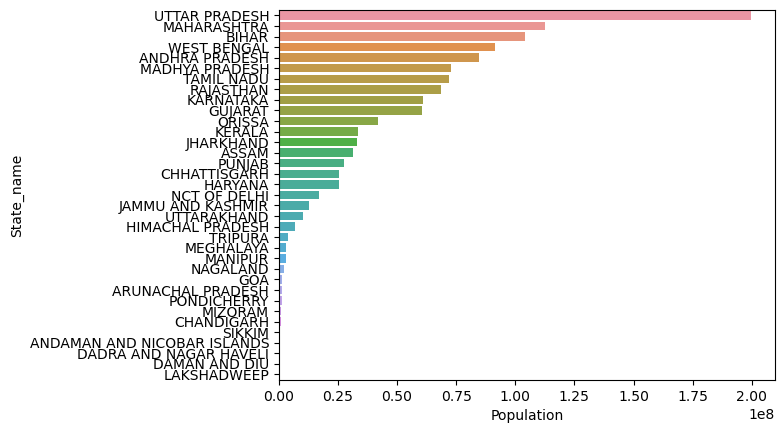

In [145]:
total_population=df.groupby(['State_name'],as_index=False)['Population'].sum().sort_values('Population',ascending=False)
sns.barplot(x="Population",y='State_name',data=total_population)

In [146]:
#saving dataframe
total_population_data = pd.DataFrame(total_population)

# Display the DataFrame
total_population

,State_name,Population
32,UTTAR PRADESH,199812341
19,MAHARASHTRA,112374333
4,BIHAR,104099452
34,WEST BENGAL,91276115
1,ANDHRA PRADESH,84580777
18,MADHYA PRADESH,72626809
30,TAMIL NADU,72147030
28,RAJASTHAN,68548437
15,KARNATAKA,61095297
10,GUJARAT,60439692


In [147]:
total_population.rename(columns={'State_name': 'State or UT'}, inplace=True)

# 1.2 Literacy Rate in each state

In [148]:
#1.2   Literacy Rate in each state
url_literacy = 'https://en.wikipedia.org/wiki/Demographics_of_India'
df_literacy = pd.read_html(url_literacy)

df_lit = df_literacy[16]

del df_lit['State or UT code']
del df_lit['Male (%)']
del df_lit['Female (%)']

df_lit.set_index('State or UT',inplace=True)

df_lit.rename(columns={'Overall (%)':'Literacy'},index={'Andhra Pradesh[84]':'Andhra Pradesh'},inplace=True)

df_lit

,Literacy
State or UT,
Jammu and Kashmir,68.74
Himachal Pradesh,83.78
Punjab,86.60
Chandigarh,86.43
Uttarakhand,79.63
Haryana,76.64
Delhi,86.34
Rajasthan,67.06
Uttar Pradesh,69.72


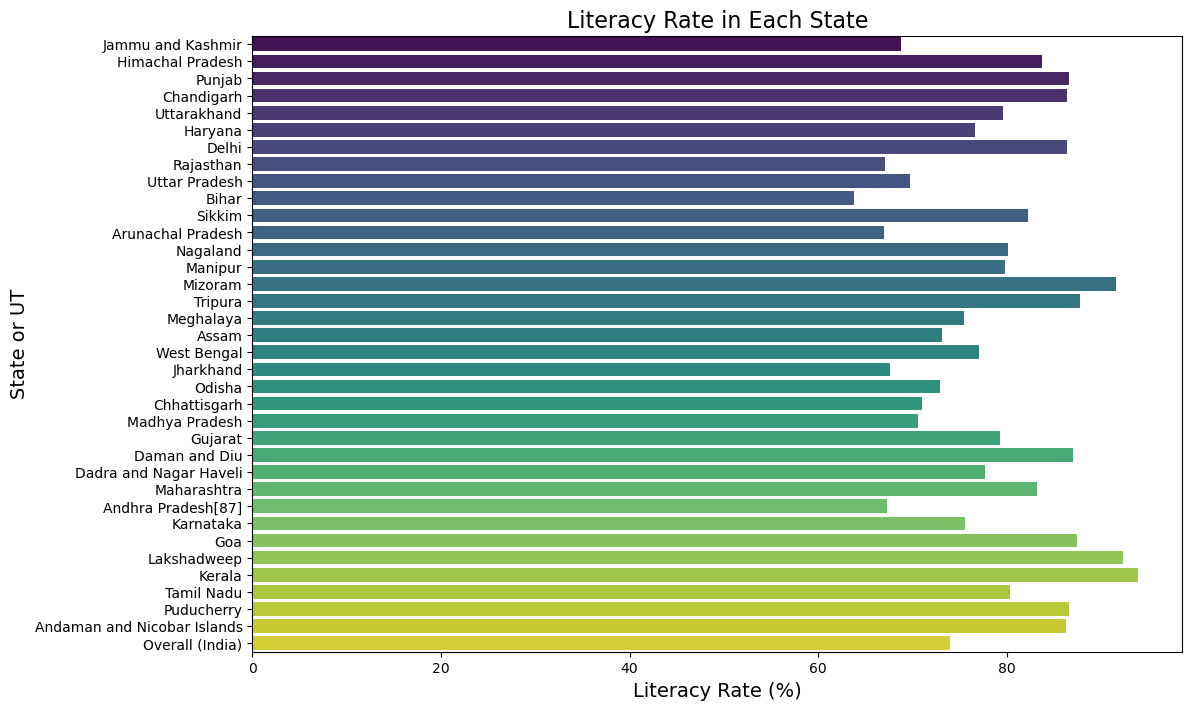

In [149]:
# visualisation of literacy rate i n each state

plt.figure(figsize=(12, 8))
sns.barplot(x=df_lit['Literacy'], y=df_lit.index, palette='viridis')

# Customize the plot
plt.title('Literacy Rate in Each State', fontsize=16)
plt.xlabel('Literacy Rate (%)', fontsize=14)
plt.ylabel('State or UT', fontsize=14)
plt.show()

In [150]:
df_lit.to_csv('literacy_data.csv', index=True)
df_lit_read = pd.read_csv('literacy_data.csv')

df_lit_read

,State or UT,Literacy
0,Jammu and Kashmir,68.74
1,Himachal Pradesh,83.78
2,Punjab,86.60
3,Chandigarh,86.43
4,Uttarakhand,79.63
5,Haryana,76.64
6,Delhi,86.34
7,Rajasthan,67.06
8,Uttar Pradesh,69.72
9,Bihar,63.82


In [151]:
df.rename(columns={'': ''}, inplace=True)

from above obnservation it is clear that the KERALA has highest literacy while BIHAR has the lowest literacy rate

In [152]:
len(df_lit_read)

36

# 1.3 Area of each state

In [ ]:
# 1.3 AREA OF EACH STATE

In [153]:
import selenium                                  #library that is used to work with selenium

from selenium import webdriver                   #importing webdriver module from selenium to open automated chrome window

import pandas as pd                              #to create DataFrame

from selenium.webdriver.common.by import By      #importing inbuilt class By 

import warnings                                  #to ignore any sort of warning

warnings.filterwarnings("ignore")

import time                                      #use to stop search engine for few seconds

import requests

from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException

In [154]:
driver = webdriver.Chrome()
driver.get('https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area')


In [113]:
ranks = []

rank_tag = driver.find_elements(By.XPATH,'/html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[2]/tbody')
for i in rank_tag:
    ranks.append(i.text)

In [114]:
ranks

['1 (S1) Rajasthan 342,239 Western 10.414\n2 (S2) Madhya Pradesh 308,252 Central 9.376 [a]\n3 (S3) Maharashtra 307,713 Western 9.359\n4 (S4) Uttar Pradesh 240,928 Northern 7.328\n5 (S5) Gujarat 196,024 Western 5.962\n6 (S6) Karnataka 191,791 Southern 5.833\n7 (S7) Andhra Pradesh 162,975 Southern 4.957 [b]\n8 (S8) Odisha 155,707 Eastern 4.736\n9 (S9) Chhattisgarh 135,192 Central 4.112 [c]\n10 (S10) Tamil Nadu 130,058 Southern 3.956\n11 (S11) Telangana 112,077 Southern 3.409\n12 (S12) Bihar 94,163 Eastern 2.864\n13 (S13) West Bengal 88,752 Eastern 2.700\n14 (S14) Arunachal Pradesh 83,743 Northeastern 2.548\n15 (S15) Jharkhand 79,716 Eastern 2.424\n16 (S16) Assam 78,438 Northeastern 2.386\n17 (UT1) Ladakh 59,146\n(166,698) Northern 1.800\n(5.079) [d]\n18 (S17) Himachal Pradesh 55,673 Northern 1.693\n19 (S18) Uttarakhand 53,483 Northern 1.626\n20 (S19) Punjab 50,362 Northern 1.531\n21(S20) Haryana 44,212 Northern 1.344\n22 (UT2) Jammu and Kashmir 42,241\n(55,538) Northern 1.285\n(1.689) [e

In [33]:
data_string = ranks[0]

# Split the string into individual entries based on newline character
entries = data_string.split('\n')

# Initialize a list to store the numerical codes
code_list = []

# Process each entry and extract the numerical code
for entry in entries:
    components = entry.split()

    # Check if there are enough components
    if len(components) >= 1:
        # Extracting the numerical code
        code = components[0]

        # Append the code to the code_list
        code_list.append(code)

# Printing the code_list
print(code_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '(166,698)', '(5.079)', '18', '19', '20', '21(S20)', '22', '(55,538)', '(1.689)', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'India', '(3,166,414)[g]', '(96.323)']


In [34]:
cl = [value.replace('(S20)', '') for value in code_list]

print(cl)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '(166,698)', '(5.079)', '18', '19', '20', '21', '22', '(55,538)', '(1.689)', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'India', '(3,166,414)[g]', '(96.323)']


In [3]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Compressed\India_Crime - Copy_2\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [35]:
len(cl)

43

In [36]:
u=[]
k = driver.find_elements(By.XPATH,'/html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[2]/tbody/tr/td[2]')
for i in k:
    u.append(i.text)

In [37]:
print(u)

['Rajasthan', 'Madhya Pradesh', 'Maharashtra', 'Uttar Pradesh', 'Gujarat', 'Karnataka', 'Andhra Pradesh', 'Odisha', 'Chhattisgarh', 'Tamil Nadu', 'Telangana', 'Bihar', 'West Bengal', 'Arunachal Pradesh', 'Jharkhand', 'Assam', 'Ladakh', 'Himachal Pradesh', 'Uttarakhand', 'Punjab', 'Haryana', 'Jammu and Kashmir', 'Kerala', 'Meghalaya', 'Manipur', 'Mizoram', 'Nagaland', 'Tripura', 'Andaman and Nicobar Islands', 'Sikkim', 'Goa', 'Delhi', 'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Chandigarh', 'Lakshadweep', 'India']


In [38]:
p = []
n = driver.find_elements(By.XPATH,'/html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[2]/tbody/tr/td[3]')
for i in n:
    p.append(i.text)
    
print(p)

['342,239', '308,252', '307,713', '240,928', '196,024', '191,791', '162,975', '155,707', '135,192', '130,058', '112,077', '94,163', '88,752', '83,743', '79,716', '78,438', '59,146\n(166,698)', '55,673', '53,483', '50,362', '44,212', '42,241\n(55,538)', '38,863', '22,429', '22,327', '21,081', '16,579', '10,491', '8,249', '7,096', '3,702', '1,484', '603', '479', '114', '32', '3,287,263\n(3,166,414)[g]']


In [39]:
cleaned = [value.replace('\n(166,698)', '').replace('\n(55,538)', '') for value in p]

print(cleaned)

['342,239', '308,252', '307,713', '240,928', '196,024', '191,791', '162,975', '155,707', '135,192', '130,058', '112,077', '94,163', '88,752', '83,743', '79,716', '78,438', '59,146', '55,673', '53,483', '50,362', '44,212', '42,241', '38,863', '22,429', '22,327', '21,081', '16,579', '10,491', '8,249', '7,096', '3,702', '1,484', '603', '479', '114', '32', '3,287,263\n(3,166,414)[g]']


In [40]:
print(p)

['342,239', '308,252', '307,713', '240,928', '196,024', '191,791', '162,975', '155,707', '135,192', '130,058', '112,077', '94,163', '88,752', '83,743', '79,716', '78,438', '59,146\n(166,698)', '55,673', '53,483', '50,362', '44,212', '42,241\n(55,538)', '38,863', '22,429', '22,327', '21,081', '16,579', '10,491', '8,249', '7,096', '3,702', '1,484', '603', '479', '114', '32', '3,287,263\n(3,166,414)[g]']


In [41]:
o = []
l = driver.find_elements(By.XPATH,'/html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[2]/tbody/tr/td[4]')
for i in l:
    o.append(i.text)
    
print(o)

['Western', 'Central', 'Western', 'Northern', 'Western', 'Southern', 'Southern', 'Eastern', 'Central', 'Southern', 'Southern', 'Eastern', 'Eastern', 'Northeastern', 'Eastern', 'Northeastern', 'Northern', 'Northern', 'Northern', 'Northern', 'Northern', 'Northern', 'Southern', 'Northeastern', 'Northeastern', 'Northeastern', 'Northeastern', 'Northeastern', 'Bay of Bengal', 'Northeastern', 'Southern', 'Northern', 'Western', 'Southern', 'Northern', 'Arabian Sea', '']


In [42]:
cu = []
h = driver.find_elements(By.XPATH,'/html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[2]/tbody/tr/td[5]')
for i in h:
    cu.append(i.text)
    
print(cu)

['10.414', '9.376', '9.359', '7.328', '5.962', '5.833', '4.957', '4.736', '4.112', '3.956', '3.409', '2.864', '2.700', '2.548', '2.424', '2.386', '1.800\n(5.079)', '1.693', '1.626', '1.531', '1.344', '1.285\n(1.689)', '1.182', '0.682', '0.680', '0.642', '0.505', '0.320', '0.251', '0.217', '0.112', '0.045', '0.018', '0.015', '0.003', '0.001', '100\n(96.323)']


In [43]:
cu

cleaned_values = [value.replace('\n(1.689)', '').replace('\n(5.079)', '') for value in cu]

print(cleaned_values)

['10.414', '9.376', '9.359', '7.328', '5.962', '5.833', '4.957', '4.736', '4.112', '3.956', '3.409', '2.864', '2.700', '2.548', '2.424', '2.386', '1.800', '1.693', '1.626', '1.531', '1.344', '1.285', '1.182', '0.682', '0.680', '0.642', '0.505', '0.320', '0.251', '0.217', '0.112', '0.045', '0.018', '0.015', '0.003', '0.001', '100\n(96.323)']


In [44]:
print(len(cl),len(u),len(cleaned),len(o),len(cleaned_values))

43 37 37 37 37


In [155]:
# creating dataframe 
df = pd.DataFrame({'State':u,'Area':cleaned,'Region':o,'Total':cleaned_values})
df

,State,Area,Region,Total
0,Rajasthan,"342,239",Western,10.414
1,Madhya Pradesh,"308,252",Central,9.376
2,Maharashtra,"307,713",Western,9.359
3,Uttar Pradesh,"240,928",Northern,7.328
4,Gujarat,"196,024",Western,5.962
5,Karnataka,"191,791",Southern,5.833
6,Andhra Pradesh,"162,975",Southern,4.957
7,Odisha,"155,707",Eastern,4.736
8,Chhattisgarh,"135,192",Central,4.112
9,Tamil Nadu,"130,058",Southern,3.956


In [174]:
df.shape

(37, 4)

In [156]:
#making permanent changes 
df.rename(columns={'State': 'State or UT'}, inplace=True)

In [157]:
df

,State or UT,Area,Region,Total
0,Rajasthan,"342,239",Western,10.414
1,Madhya Pradesh,"308,252",Central,9.376
2,Maharashtra,"307,713",Western,9.359
3,Uttar Pradesh,"240,928",Northern,7.328
4,Gujarat,"196,024",Western,5.962
5,Karnataka,"191,791",Southern,5.833
6,Andhra Pradesh,"162,975",Southern,4.957
7,Odisha,"155,707",Eastern,4.736
8,Chhattisgarh,"135,192",Central,4.112
9,Tamil Nadu,"130,058",Southern,3.956


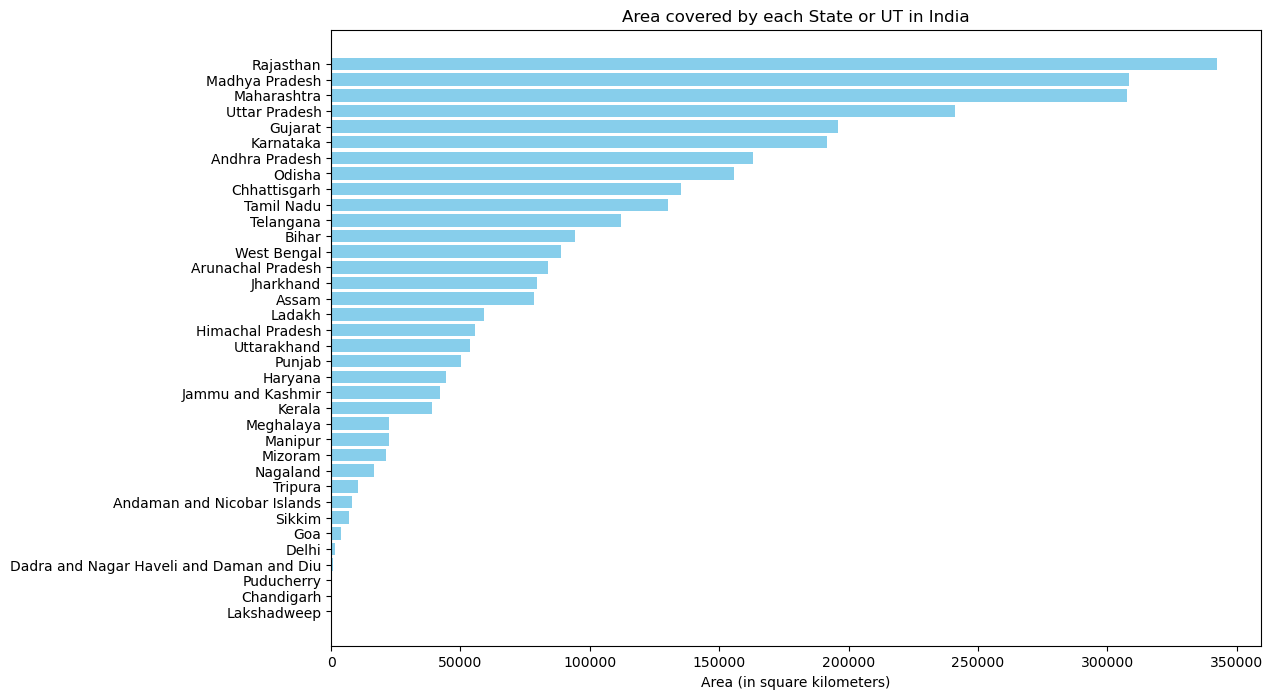

In [179]:
# Convert 'Area' to numeric (remove commas and convert to float)
df['Area'] = pd.to_numeric(df['Area'].str.replace(',', ''), errors='coerce')

# Exclude the row with 'India'
plot_data = df[df['State or UT'] != 'India']

plt.figure(figsize=(12, 8))
plt.barh(plot_data['State or UT'], plot_data['Area'], color='skyblue')
plt.xlabel('Area (in square kilometers)')
plt.title('Area covered by each State or UT in India')
plt.gca().invert_yaxis()  # To have the larger values at the top
plt.show()

In [158]:
#merging two frames 
merged_df = pd.merge(df, df_lit_read, on='State or UT')


In [159]:
merged_df

,State or UT,Area,Region,Total,Literacy
0,Rajasthan,"342,239",Western,10.414,67.06
1,Madhya Pradesh,"308,252",Central,9.376,70.63
2,Maharashtra,"307,713",Western,9.359,83.20
3,Uttar Pradesh,"240,928",Northern,7.328,69.72
4,Gujarat,"196,024",Western,5.962,79.31
5,Karnataka,"191,791",Southern,5.833,75.60
6,Odisha,"155,707",Eastern,4.736,72.90
7,Chhattisgarh,"135,192",Central,4.112,71.04
8,Tamil Nadu,"130,058",Southern,3.956,80.33
9,Bihar,"94,163",Eastern,2.864,63.82


In [160]:
len(total_population)

35

,State or UT,Population
32,UTTAR PRADESH,199812341
19,MAHARASHTRA,112374333
4,BIHAR,104099452
34,WEST BENGAL,91276115
1,ANDHRA PRADESH,84580777
18,MADHYA PRADESH,72626809
30,TAMIL NADU,72147030
28,RAJASTHAN,68548437
15,KARNATAKA,61095297
10,GUJARAT,60439692


# 1.4   Collect any other data that helps with your analysis.

In [ ]:
# sorting religion data

In [165]:
d=pd.read_csv(r"C:\Users\Admin\Downloads\Compressed\India_Crime - Copy_2\India_Crime - Copy\file.csv")

In [167]:
d

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,...,958,3,21,14,8773,5711,4475,19760,12543,9428
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,26077,343,119,0,6325,3668,1300,18786,12088,5922
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,...,21870,77,84,4,12707,10042,5133,57350,30741,17464


In [172]:
# Group by 'State_name' and sum the religious populations
religious_population_df = d.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].sum()

# Display the resulting DataFrame
religious_population_df

,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
ANDAMAN AND NICOBAR ISLANDS,264296,32413,80984,1286,338,31
ANDHRA PRADESH,74824149,8082412,1129784,40244,36692,53849
ARUNACHAL PRADESH,401876,27045,418732,3287,162815,771
ASSAM,19180759,10679345,1165867,20672,54993,25949
BIHAR,86078686,17557809,129247,23779,25453,18914
CHANDIGARH,852574,51447,8720,138329,1160,1960
CHHATTISGARH,23819789,514998,490542,70036,70467,61510
DADRA AND NAGAR HAVELI,322857,12922,5113,217,634,1186
DAMAN AND DIU,220150,19277,2820,172,217,287


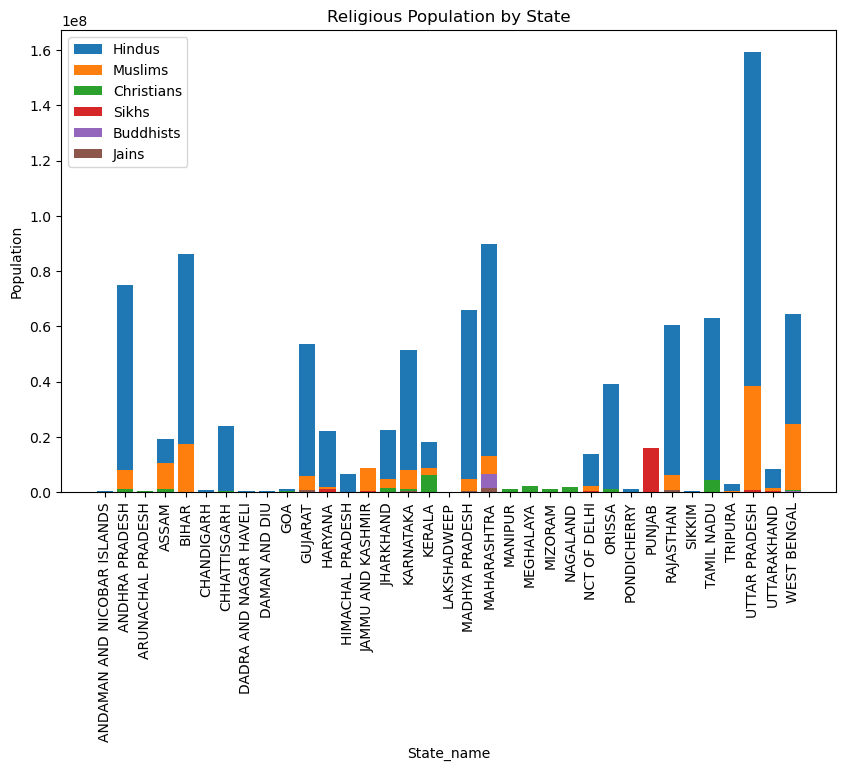

In [173]:
plt.figure(figsize=(10, 6))

# Plotting bar graphs for each religious population
for religion in ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']:
    plt.bar(r.index, r[religion], label=religion)

# Adding labels and title
plt.xlabel('State_name')
plt.ylabel('Population')
plt.title('Religious Population by State')
plt.xticks(rotation=90)
plt.legend()

# 1.5

In [ ]:
# data is already save in different dataframes so that it could be use  for further purpose.